# 1. Install and import libraries

In [148]:
import numpy as np
import pandas as pd
import cv2

import PIL
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
import statistics

# 2. Read csv

In [149]:
#define a function to convert strings in csv back to rgb arrays
def converter(instr):
    return np.fromstring(instr[1:-1],dtype=int,sep=' ')

In [150]:
#read cluster_coloname csv with the centers columns converted from string to array
col_list = ['image_list', 'instagram_handle', 'date_post',\
             'seq_post_samedate', 'month', 'center1_2', 'center1_3', 'center1_4', 'center2_2',\
             'center2_3', 'center2_4', 'center3_3', 'center3_4', 'center4_4', 'colorgroup1_2',\
            'colorgroup2_2','colorgroup1_3','colorgroup2_3','colorgroup3_3','colorgroup1_4',\
            'colorgroup2_4','colorgroup3_4','colorgroup4_4']

cluster_df=pd.read_csv('../data/cluster_colorname.csv',\
                       converters={'center1_2':converter, \
                                   'center1_3':converter, \
                                   'center1_4':converter,\
                                   'center2_2':converter,\
                                   'center2_3':converter,\
                                   'center2_4':converter,\
                                   'center3_3':converter,\
                                   'center3_4':converter,\
                                   'center4_4':converter,\
                                  }, usecols = col_list)

cluster_df.columns

Index(['image_list', 'instagram_handle', 'date_post', 'seq_post_samedate',
       'month', 'center1_2', 'center1_3', 'center1_4', 'center2_2',
       'center2_3', 'center2_4', 'center3_3', 'center3_4', 'center4_4',
       'colorgroup1_2', 'colorgroup2_2', 'colorgroup1_3', 'colorgroup2_3',
       'colorgroup3_3', 'colorgroup1_4', 'colorgroup2_4', 'colorgroup3_4',
       'colorgroup4_4'],
      dtype='object')

# 3. Clustering by month on each photo's three clusters

In [151]:
#define function to get clusters and silhouette score, specifying month (x) and no of clusters (y)
#enter month in numbers, as x in the function. e.g. for Feb, x=2
#enter number of clusters as y
def cluster3_month_k(x, y):
    x_df = cluster_df.loc[cluster_df['month'] == x]
    x_df = x_df[['image_list', 'instagram_handle', 'date_post',\
                 'seq_post_samedate', 'month', 'center1_3','center2_3','center3_3',\
                 'colorgroup1_3','colorgroup2_3','colorgroup3_3']]
    x_df.reset_index(drop=True, inplace = True)
    x_array = x_df['center1_3'][0]
    for n in range (1, len(x_df)):
            x_array = np.concatenate([x_array, x_df['center1_3'][n]])
    for n in range (0, len(x_df)):
            x_array = np.concatenate([x_array, x_df['center2_3'][n]])
    for n in range (0, len(x_df)):
            x_array = np.concatenate([x_array, x_df['center3_3'][n]])
    x_array = x_array.reshape(-1,3)
    
    #get list of color groups starting from 1_3
    x_colorgroup = [*x_df['colorgroup1_3'], *x_df['colorgroup2_3'], *x_df['colorgroup3_3']]
    x_array_colorgroup = pd.DataFrame(zip(x_array, x_colorgroup), columns = ['rgb', 'color_group'])
    
    #remove the following colorgroups as they are likely from skin and hair
    #this is a current limitation as hair and skin could not be automatically removed
    colorgroup_exclude = ['brown','black','nude','grey']
    x_array_colorgroup = x_array_colorgroup[~x_array_colorgroup.color_group.isin(colorgroup_exclude)]
    x_array_colorgroup.reset_index(drop=True, inplace = True)
    
    #get filtered array
    filtered_x_array = x_array_colorgroup['rgb'][0]
    for n in range (1, len(x_array_colorgroup)):
        filtered_x_array = np.concatenate([filtered_x_array, x_array_colorgroup['rgb'][n]])
    filtered_x_array = filtered_x_array.reshape(-1,3)
    
    #k-means clustering
    clt = KMeans(n_clusters = y, max_iter=500, random_state=5).fit(filtered_x_array)
    centers = clt.cluster_centers_
    centers = np.uint8(centers)
    score = silhouette_score(filtered_x_array, clt.labels_, metric='euclidean')
    return centers, score

In [152]:
#def function to display all the centers in a horizontal bar
def palette(centers):
    height = 50
    width = 300
    palette = np.zeros((height, width, 3), np.uint8)
    steps = width/centers.shape[0]
    for idx, centers in enumerate(centers): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

In [153]:
#def function to show two images side by side
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

## 3a. 5 clusters for each month

In [154]:
#clusters of 5 for each month
jan = cluster3_month_k(1,5)
feb = cluster3_month_k(2,5)
mar = cluster3_month_k(3,5)
apr = cluster3_month_k(4,5)
may = cluster3_month_k(5,5)
jun = cluster3_month_k(6,5)
jul = cluster3_month_k(7,5)
aug = cluster3_month_k(8,5)
sep = cluster3_month_k(9,5)
octo = cluster3_month_k(10,5)
nov = cluster3_month_k(11,5)

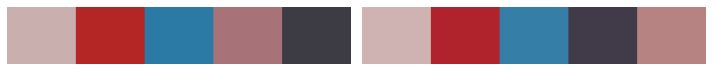

In [155]:
#jan vs feb palette, 5 clusters
show_img_compar(palette(jan[0]), palette(feb[0]))

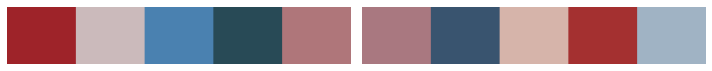

In [156]:
#mar vs apr palette, 5 clusters
show_img_compar(palette(mar[0]), palette(apr[0]))

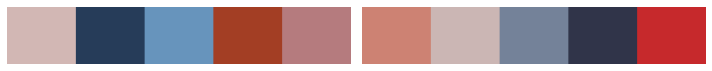

In [157]:
#apr vs may palette, 5 clusters
show_img_compar(palette(may[0]), palette(jun[0]))

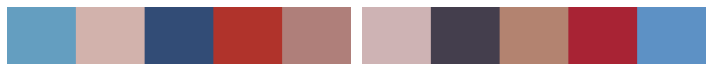

In [158]:
#jun vs jul palette, 5 clusters
show_img_compar(palette(jul[0]), palette(aug[0]))

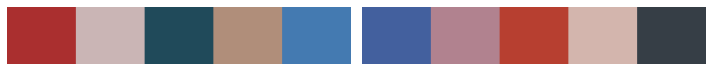

In [159]:
#aug vs sep palette, 5 clusters
show_img_compar(palette(sep[0]), palette(octo[0]))

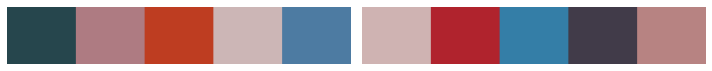

In [160]:
#nov vs feb palette, 5 clusters
show_img_compar(palette(nov[0]), palette(feb[0]))

## 3b. 3 clusters for each month

In [161]:
#clusters of 3 for each month
jan3 = cluster3_month_k(1,3)
feb3 = cluster3_month_k(2,3)
mar3 = cluster3_month_k(3,3)
apr3 = cluster3_month_k(4,3)
may3 = cluster3_month_k(5,3)
jun3 = cluster3_month_k(6,3)
jul3 = cluster3_month_k(7,3)
aug3 = cluster3_month_k(8,3)
sep3 = cluster3_month_k(9,3)
octo3 = cluster3_month_k(10,3)
nov3 = cluster3_month_k(11,3)

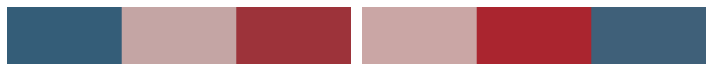

In [162]:
show_img_compar(palette(jan3[0]), palette(feb3[0]))

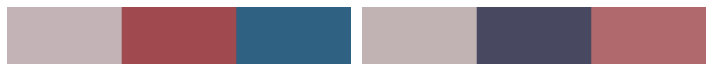

In [163]:
show_img_compar(palette(mar3[0]), palette(apr3[0]))

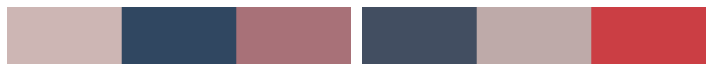

In [164]:
show_img_compar(palette(may3[0]), palette(jun3[0]))

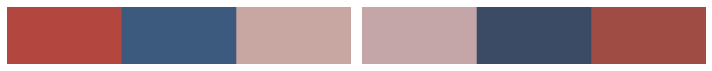

In [165]:
show_img_compar(palette(jul3[0]), palette(aug3[0]))

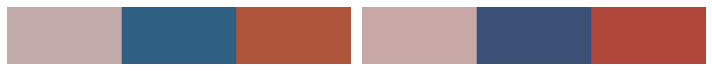

In [166]:
show_img_compar(palette(sep3[0]), palette(octo3[0]))

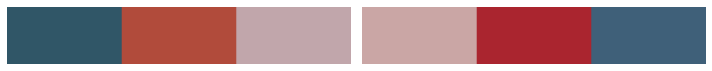

In [167]:
show_img_compar(palette(nov3[0]), palette(feb3[0]))

In [176]:
%%time
cluster3_scores = []
cluster5_scores = []
cluster7_scores = []

for n in range (1,12):
    x3 = cluster3_month_k(n,3)
    cluster3_scores.append(x3[1].round(2))
    
    
    x5 = cluster3_month_k(n,5)
    cluster5_scores.append(x5[1].round(2))
    
    
    x7 = cluster3_month_k(n,7)
    cluster7_scores.append(x7[1].round(2))
    


CPU times: user 5.68 s, sys: 1.05 s, total: 6.73 s
Wall time: 970 ms


## 3c. Evaluating the silhouette scores for various cluster sizes

In [177]:
cluster3_score_df = pd.DataFrame(zip(cluster3_scores, cluster5_scores, cluster7_scores), \
                                 columns = ['cluster3_scores', 'cluster5_scores', 'cluster7_scores'])
cluster3_score_df['month'] = [1,2,3,4,5,6,7,8,9,10,11]
cluster3_score_df

cluster3_scores  cluster5_scores  cluster7_scores  month
0              0.55             0.48             0.44      1
1              0.60             0.48             0.46      2
2              0.48             0.44             0.46      3
3              0.43             0.39             0.41      4
4              0.45             0.46             0.43      5
5              0.50             0.42             0.42      6
6              0.52             0.45             0.45      7
7              0.45             0.42             0.43      8
8              0.50             0.40             0.44      9
9              0.52             0.39             0.38     10
10             0.49             0.42             0.42     11

In [178]:
print(round(statistics.mean(cluster3_scores),2))
print(round(statistics.mean(cluster5_scores),2))
print(round(statistics.mean(cluster7_scores),2))

0.5
0.43
0.43


While having 3 clusters per month seem to have the best average silhouette score of 0.50, increasing the clusters to 5 or even 7 seems to offer more insights into slightly different color themes that were emerging in the different months. Since the goal of this project is to give blogshop owners into trending color themes, the slight dip in silhouette score to 0.43 seems reasonable to offer more insights.

In [179]:
cluster3_score_df['max_score'] = cluster3_score_df[['cluster3_scores', 'cluster5_scores', 'cluster7_scores']]\
.max(axis=1)
cluster3_score_df

cluster3_scores  cluster5_scores  cluster7_scores  month  max_score
0              0.55             0.48             0.44      1       0.55
1              0.60             0.48             0.46      2       0.60
2              0.48             0.44             0.46      3       0.48
3              0.43             0.39             0.41      4       0.43
4              0.45             0.46             0.43      5       0.46
5              0.50             0.42             0.42      6       0.50
6              0.52             0.45             0.45      7       0.52
7              0.45             0.42             0.43      8       0.45
8              0.50             0.40             0.44      9       0.50
9              0.52             0.39             0.38     10       0.52
10             0.49             0.42             0.42     11       0.49

In [180]:
print(round(statistics.mean(cluster3_score_df['max_score']),2))

0.5


# 4. Identifying photos that contributed to the centers

The below codes are to look at photos that contributed to centers of interest in any particular month. In this case, we will be exploring the months of February (last CNY) and November (the most recent month), to see if there are photos that could give inspiration to the blogshop owners when planning the CNY collection.

In [24]:
#define a function to get the cluster labels for clustering where month and k are specified
#based on clustering the 3 clusters identified for EACH photo
def cluster3labels_month_k(x, y):
    x_df = cluster_df.loc[cluster_df['month'] == x]
    x_df = x_df[['image_list', 'instagram_handle', 'date_post',\
                 'seq_post_samedate', 'month', 'center1_3','center2_3','center3_3',\
                 'colorgroup1_3','colorgroup2_3','colorgroup3_3']]
    x_df.reset_index(drop=True, inplace = True)
    x_array = x_df['center1_3'][0]
    for n in range (1, len(x_df)):
            x_array = np.concatenate([x_array, x_df['center1_3'][n]])
    for n in range (0, len(x_df)):
            x_array = np.concatenate([x_array, x_df['center2_3'][n]])
    for n in range (0, len(x_df)):
            x_array = np.concatenate([x_array, x_df['center3_3'][n]])
    x_array = x_array.reshape(-1,3)
    
    #get list of color groups starting from 1_3
    x_colorgroup = [*x_df['colorgroup1_3'], *x_df['colorgroup2_3'], *x_df['colorgroup3_3']]
    x_array_colorgroup = pd.DataFrame(zip(x_array, x_colorgroup), columns = ['rgb', 'color_group'])
    
    #remove the following colorgroups as they are likely from skin and hair
    #this is a current limitation as hair and skin could not be automatically removed
    colorgroup_exclude = ['brown','black','nude','grey']
    x_array_colorgroup = x_array_colorgroup[~x_array_colorgroup.color_group.isin(colorgroup_exclude)]
    x_array_colorgroup.reset_index(drop=True, inplace = True)
    
    #get filtered array
    filtered_x_array = x_array_colorgroup['rgb'][0]
    for n in range (1, len(x_array_colorgroup)):
        filtered_x_array = np.concatenate([filtered_x_array, x_array_colorgroup['rgb'][n]])
    filtered_x_array = filtered_x_array.reshape(-1,3)
    
    #k-means clustering
    clt = KMeans(n_clusters = y, max_iter=500, random_state=5).fit(filtered_x_array)
    labels = clt.labels_
    return x_df, filtered_x_array,labels

## 4a. February clusters

In [25]:
#cluster february photos into 5 clusters
feb_df = cluster3labels_month_k(2,5)[0]
feb_df.head()

image_list instagram_handle  \
0  ../pictures/wo_background/ec24m/ec24m_2021-02-...            ec24m   
1  ../pictures/wo_background/ec24m/ec24m_2021-02-...            ec24m   
2  ../pictures/wo_background/ec24m/ec24m_2021-02-...            ec24m   
3  ../pictures/wo_background/ec24m/ec24m_2021-02-...            ec24m   
4  ../pictures/wo_background/ec24m/ec24m_2021-02-...            ec24m   

    date_post  seq_post_samedate  month        center1_3        center2_3  \
0  2021-02-03                  0      2     [67, 44, 42]  [208, 179, 161]   
1  2021-02-07                  1      2     [53, 38, 37]  [183, 167, 166]   
2  2021-02-21                  2      2  [163, 158, 152]     [42, 42, 37]   
3  2021-02-23                  1      2  [143, 118, 116]  [184, 169, 174]   
4  2021-02-05                  2      2  [152, 110, 118]     [68, 41, 36]   

         center3_3 colorgroup1_3 colorgroup2_3 colorgroup3_3  
0    [194, 86, 68]         black          nude         brown  
1    [119, 93, 81]         black          grey         brown  
2   [121, 101, 82]          grey         black         brown  
3     [73, 53, 46]         brown          grey         black  
4  [188, 165, 163]         brown         black          grey

In [26]:
#obtain the rgb array that was used for clustering
feb_filtered_array = cluster3labels_month_k(2,5)[1]

In [27]:
#obtain the cluster labels tagged to each of the rgb
feb_filtered_labels = cluster3labels_month_k(2,5)[2]

In [28]:
#put array with labels into a dataframe
feb_filtered_array = feb_filtered_array.tolist()
feb_filtered_labels = feb_filtered_labels.tolist()
feb_center_labels = pd.DataFrame(zip(feb_filtered_array, feb_filtered_labels), \
                                 columns = ['feb_filtered_array', 'feb_filtered_labels'])

feb_center_labels.head()

feb_filtered_array  feb_filtered_labels
0     [151, 62, 103]                    1
1    [204, 154, 144]                    4
2    [201, 166, 177]                    0
3    [184, 158, 162]                    0
4      [164, 75, 52]                    1

In [29]:
#get centers labelled 1
feb_center1 = feb_center_labels.loc[feb_center_labels['feb_filtered_labels'] == 1]
feb_center1.reset_index(drop=True, inplace = True)
feb_center1.head()

feb_filtered_array  feb_filtered_labels
0     [151, 62, 103]                    1
1      [164, 75, 52]                    1
2     [151, 62, 103]                    1
3      [164, 75, 52]                    1
4      [169, 52, 52]                    1

In [30]:
#get list of rgb arrays that are tagged to cluster 1
feb_center1_list = feb_center1['feb_filtered_array'].tolist()

In [31]:
#define a function to determine if a photo's centre belongs to the identified overall month's center
def belong_center(x):
    x = x.tolist()
    if x in feb_center1_list:
        return 1
    else:
        return 0


In [32]:
#indicator columns to indicate if any of the 3 centers \
#of each photo belongs to the cluster of interest for the month
feb_df['center1_3_match_feb_center1'] = feb_df['center1_3'].apply(belong_center)

In [33]:
feb_df['center2_3_match_feb_center1'] = feb_df['center2_3'].apply(belong_center)

In [34]:
feb_df['center3_3_match_feb_center1'] = feb_df['center3_3'].apply(belong_center)

In [35]:
feb_df.head()

image_list instagram_handle  \
0  ../pictures/wo_background/ec24m/ec24m_2021-02-...            ec24m   
1  ../pictures/wo_background/ec24m/ec24m_2021-02-...            ec24m   
2  ../pictures/wo_background/ec24m/ec24m_2021-02-...            ec24m   
3  ../pictures/wo_background/ec24m/ec24m_2021-02-...            ec24m   
4  ../pictures/wo_background/ec24m/ec24m_2021-02-...            ec24m   

    date_post  seq_post_samedate  month        center1_3        center2_3  \
0  2021-02-03                  0      2     [67, 44, 42]  [208, 179, 161]   
1  2021-02-07                  1      2     [53, 38, 37]  [183, 167, 166]   
2  2021-02-21                  2      2  [163, 158, 152]     [42, 42, 37]   
3  2021-02-23                  1      2  [143, 118, 116]  [184, 169, 174]   
4  2021-02-05                  2      2  [152, 110, 118]     [68, 41, 36]   

         center3_3 colorgroup1_3 colorgroup2_3 colorgroup3_3  \
0    [194, 86, 68]         black          nude         brown   
1    [119, 93, 81]         black          grey         brown   
2   [121, 101, 82]          grey         black         brown   
3     [73, 53, 46]         brown          grey         black   
4  [188, 165, 163]         brown         black          grey   

   center1_3_match_feb_center1  center2_3_match_feb_center1  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   center3_3_match_feb_center1  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0

In [36]:
#check if any of the centers match, using an indicator column that is >0 if any match, and = 0 if no matches
feb_df['anycentermatch'] = feb_df['center1_3_match_feb_center1'] + \
feb_df['center2_3_match_feb_center1'] + feb_df['center3_3_match_feb_center1']

In [37]:
feb_df

image_list instagram_handle  \
0    ../pictures/wo_background/ec24m/ec24m_2021-02-...            ec24m   
1    ../pictures/wo_background/ec24m/ec24m_2021-02-...            ec24m   
2    ../pictures/wo_background/ec24m/ec24m_2021-02-...            ec24m   
3    ../pictures/wo_background/ec24m/ec24m_2021-02-...            ec24m   
4    ../pictures/wo_background/ec24m/ec24m_2021-02-...            ec24m   
..                                                 ...              ...   
595  ../pictures/wo_background/xinlinnn/xinlinnn_20...         xinlinnn   
596  ../pictures/wo_background/xinlinnn/xinlinnn_20...         xinlinnn   
597  ../pictures/wo_background/xinlinnn/xinlinnn_20...         xinlinnn   
598  ../pictures/wo_background/xinlinnn/xinlinnn_20...         xinlinnn   
599  ../pictures/wo_background/xinlinnn/xinlinnn_20...         xinlinnn   

      date_post  seq_post_samedate  month        center1_3        center2_3  \
0    2021-02-03                  0      2     [67, 44, 42]  [208, 179, 161]   
1    2021-02-07                  1      2     [53, 38, 37]  [183, 167, 166]   
2    2021-02-21                  2      2  [163, 158, 152]     [42, 42, 37]   
3    2021-02-23                  1      2  [143, 118, 116]  [184, 169, 174]   
4    2021-02-05                  2      2  [152, 110, 118]     [68, 41, 36]   
..          ...                ...    ...              ...              ...   
595  2021-02-07                  2      2     [32, 26, 21]  [152, 149, 156]   
596  2021-02-27                  0      2  [240, 222, 219]     [96, 68, 59]   
597  2021-02-05                  2      2  [159, 118, 103]     [63, 38, 30]   
598  2021-02-07                  1      2  [153, 118, 104]     [37, 30, 23]   
599  2021-02-03                  0      2    [189, 47, 35]  [201, 163, 143]   

           center3_3 colorgroup1_3 colorgroup2_3 colorgroup3_3  \
0      [194, 86, 68]         black          nude         brown   
1      [119, 93, 81]         black          grey         brown   
2     [121, 101, 82]          grey         black         brown   
3       [73, 53, 46]         brown          grey         black   
4    [188, 165, 163]         brown         black          grey   
..               ...           ...           ...           ...   
595   [139, 107, 93]         black          grey          grey   
596  [181, 140, 127]          nude          grey         brown   
597  [206, 189, 183]         brown         black          grey   
598  [170, 171, 181]         brown         brown          grey   
599     [73, 30, 30]           red         brown         black   

     center1_3_match_feb_center1  center2_3_match_feb_center1  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   
..                           ...                          ...   
595                            0                            0   
596                            0                            0   
597                            0                            0   
598                            0                            0   
599                            1                            0   

     center3_3_match_feb_center1  anycentermatch  
0                              0               0  
1                              0               0  
2                              0               0  
3                              0               0  
4                              0               0  
..                           ...             ...  
595                            0               0  
596                            0               0  
597                            0               0  
598                            0               0  
599                            0               1  

[600 ro

In [38]:
#filtered dataframe of photos that have at least one center that is in cluster 1
feb_df_center1match = feb_df.loc[feb_df['anycentermatch'] != 0]
len(feb_df_center1match)

42

In [39]:
#get list of image paths, for photos which have centers that match cluster 1
feb_center1_imagelist = feb_df_center1match['image_list'].to_list()

In [40]:
#open images from the filtered list above, that match cluster 1
imgfile1 = Image.open(feb_center1_imagelist[0])
imgfile2 = Image.open(feb_center1_imagelist[1])
imgfile3 = Image.open(feb_center1_imagelist[2])
imgfile4 = Image.open(feb_center1_imagelist[3])
imgfile5 = Image.open(feb_center1_imagelist[4])
imgfile6 = Image.open(feb_center1_imagelist[5])
imgfile7 = Image.open(feb_center1_imagelist[6])
imgfile8 = Image.open(feb_center1_imagelist[7])
imgfile9 = Image.open(feb_center1_imagelist[8])
imgfile10 = Image.open(feb_center1_imagelist[9])
imgfile11 = Image.open(feb_center1_imagelist[10])
imgfile12 = Image.open(feb_center1_imagelist[11])
imgfile13 = Image.open(feb_center1_imagelist[12])
imgfile14 = Image.open(feb_center1_imagelist[13])
imgfile15 = Image.open(feb_center1_imagelist[14])
imgfile16 = Image.open(feb_center1_imagelist[15])
imgfile17 = Image.open(feb_center1_imagelist[16])
imgfile40 = Image.open(feb_center1_imagelist[39])
imgfile41 = Image.open(feb_center1_imagelist[40])

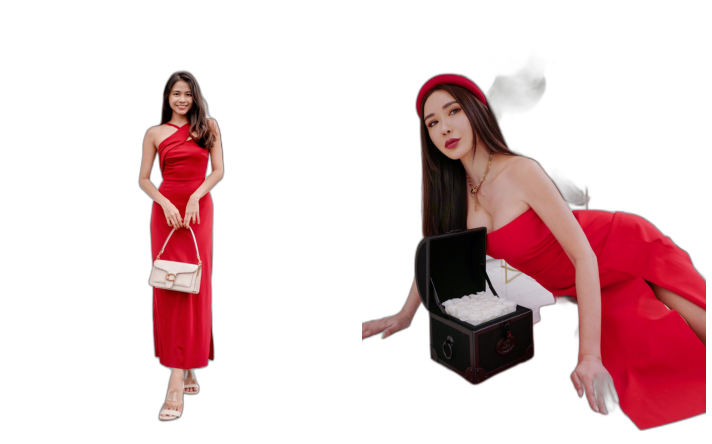

In [41]:
#will be opening sample images that match cluster 1, in pairs
show_img_compar(imgfile40, imgfile2)

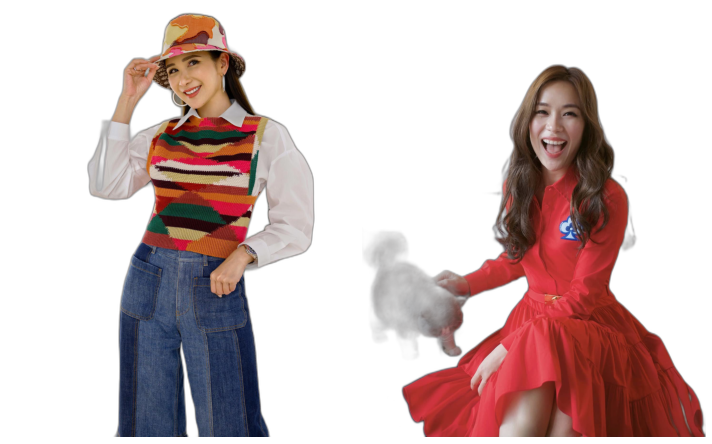

In [42]:
show_img_compar(imgfile6, imgfile7)

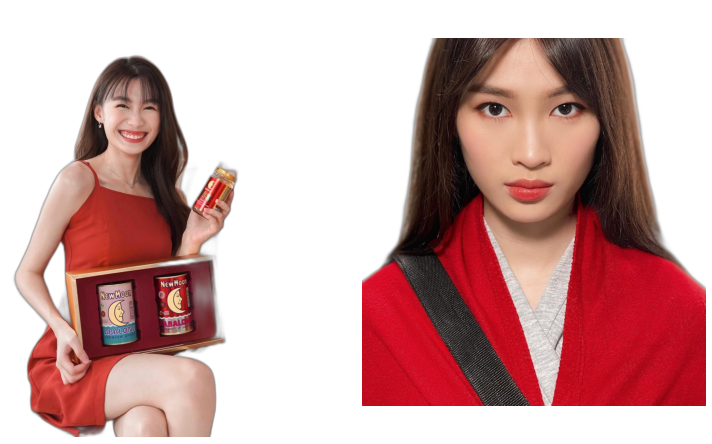

In [43]:
show_img_compar(imgfile10, imgfile11)

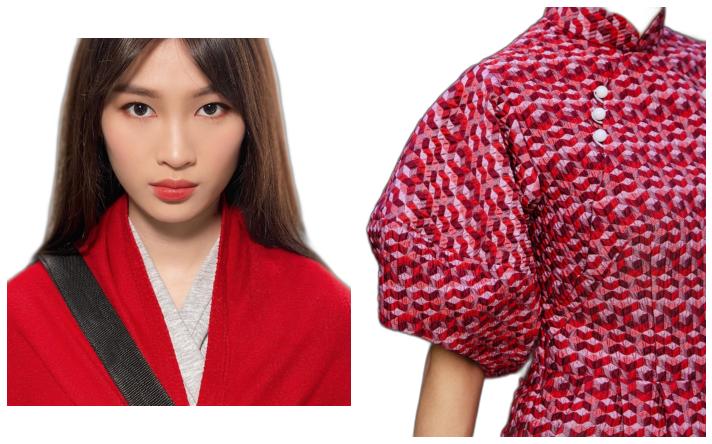

In [44]:
show_img_compar(imgfile11, imgfile13)

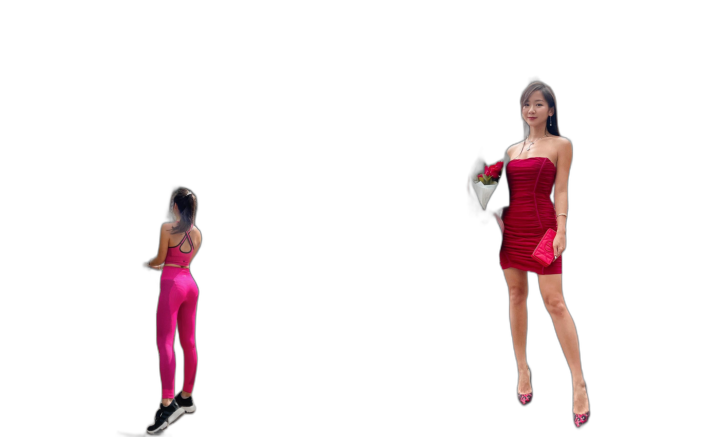

In [45]:
show_img_compar(imgfile15, imgfile17)

From here on, we are repeating the steps above for each of the centers that we are interested in

In [46]:
#get centers labelled 2
feb_center2 = feb_center_labels.loc[feb_center_labels['feb_filtered_labels'] == 2]
feb_center2.reset_index(drop=True, inplace = True)
feb_center2

feb_filtered_array  feb_filtered_labels
0      [20, 131, 185]                    2
1      [94, 110, 180]                    2
2      [98, 164, 170]                    2
3      [21, 125, 172]                    2
4       [32, 84, 135]                    2
5      [90, 111, 139]                    2
6      [21, 117, 155]                    2
7      [35, 120, 172]                    2
8      [14, 130, 191]                    2
9       [6, 136, 207]                    2
10    [109, 155, 202]                    2
11    [100, 156, 159]                    2
12     [80, 141, 147]                    2
13     [75, 107, 153]                    2
14     [19, 115, 154]                    2
15     [21, 115, 157]                    2

In [47]:
feb_center2_list = feb_center2['feb_filtered_array'].tolist()
feb_center2_list

[[20, 131, 185],
 [94, 110, 180],
 [98, 164, 170],
 [21, 125, 172],
 [32, 84, 135],
 [90, 111, 139],
 [21, 117, 155],
 [35, 120, 172],
 [14, 130, 191],
 [6, 136, 207],
 [109, 155, 202],
 [100, 156, 159],
 [80, 141, 147],
 [75, 107, 153],
 [19, 115, 154],
 [21, 115, 157]]

In [48]:
#define a function to determine if a photo's centre belongs to the identified overall month's center
def belong_center2(x):
    x = x.tolist()
    if x in feb_center2_list:
        return 1
    else:
        return 0

In [49]:
feb_df['center1_3_match_feb_center2'] = feb_df['center1_3'].apply(belong_center2)
feb_df['center2_3_match_feb_center2'] = feb_df['center2_3'].apply(belong_center2)
feb_df['center3_3_match_feb_center2'] = feb_df['center3_3'].apply(belong_center2)

In [50]:
feb_df['anycenter2match'] = feb_df['center1_3_match_feb_center2'] + \
feb_df['center2_3_match_feb_center2'] + feb_df['center3_3_match_feb_center2']

In [51]:
feb_df_center2match = feb_df.loc[feb_df['anycenter2match'] != 0]
len(feb_df_center2match)

16

In [52]:
feb_center2_imagelist = feb_df_center2match['image_list'].to_list()
feb_center2_imagelist

['../pictures/wo_background/jiaqiwoo/jiaqiwoo_2021-02-22_C.png',
 '../pictures/wo_background/limrebecca/limrebecca_2021-02-06_1.png',
 '../pictures/wo_background/limrebecca/limrebecca_2021-02-06_4.png',
 '../pictures/wo_background/kimlimhl/kimlimhl_2021-02-07_C.png',
 '../pictures/wo_background/aureliang_/aureliang__2021-02-25_C.png',
 '../pictures/wo_background/rchlwngxx/rchlwngxx_2021-02-01_1.png',
 '../pictures/wo_background/saffronsharpe/saffronsharpe_2021-02-25_2.png',
 '../pictures/wo_background/honglingg_/honglingg__2021-02-12_1.png',
 '../pictures/wo_background/honglingg_/honglingg__2021-02-12_3.png',
 '../pictures/wo_background/honglingg_/honglingg__2021-02-12_2.png',
 '../pictures/wo_background/fionafussi/fionafussi_2021-02-28_3.png',
 '../pictures/wo_background/ohhowstrange/ohhowstrange_2021-02-26_1.png',
 '../pictures/wo_background/ohhowstrange/ohhowstrange_2021-02-26_3.png',
 '../pictures/wo_background/ohhowstrange/ohhowstrange_2021-02-26_2.png',
 '../pictures/wo_backgroun

In [53]:
imgfile1 = Image.open(feb_center2_imagelist[0])
imgfile2 = Image.open(feb_center2_imagelist[1])
imgfile3 = Image.open(feb_center2_imagelist[2])
imgfile4 = Image.open(feb_center2_imagelist[3])
imgfile5 = Image.open(feb_center2_imagelist[4])
imgfile6 = Image.open(feb_center2_imagelist[5])
imgfile7 = Image.open(feb_center2_imagelist[6])
imgfile8 = Image.open(feb_center2_imagelist[7])
imgfile9 = Image.open(feb_center2_imagelist[8])
imgfile10 = Image.open(feb_center2_imagelist[9])
imgfile11 = Image.open(feb_center2_imagelist[10])
imgfile12 = Image.open(feb_center2_imagelist[11])
imgfile13 = Image.open(feb_center2_imagelist[12])
imgfile14 = Image.open(feb_center2_imagelist[13])
imgfile15 = Image.open(feb_center2_imagelist[14])
imgfile16 = Image.open(feb_center2_imagelist[15])

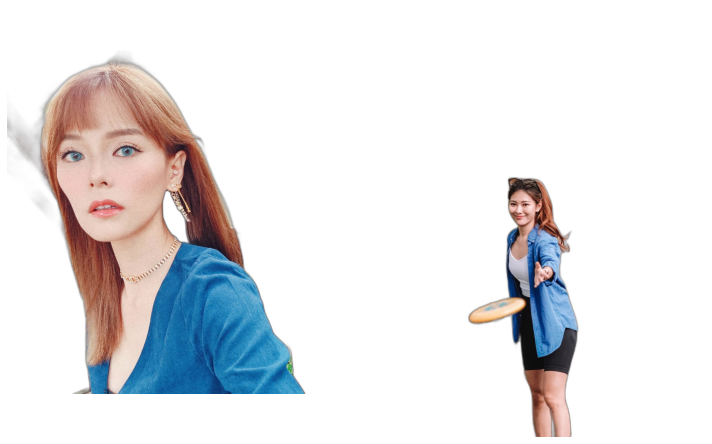

In [54]:
show_img_compar(imgfile1, imgfile5)

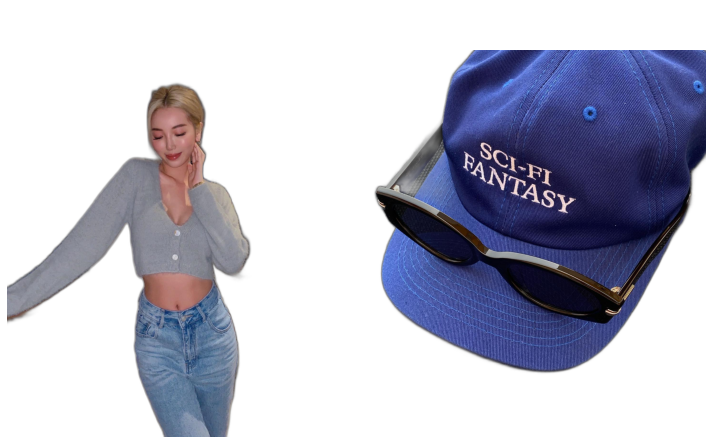

In [55]:
show_img_compar(imgfile6, imgfile7)

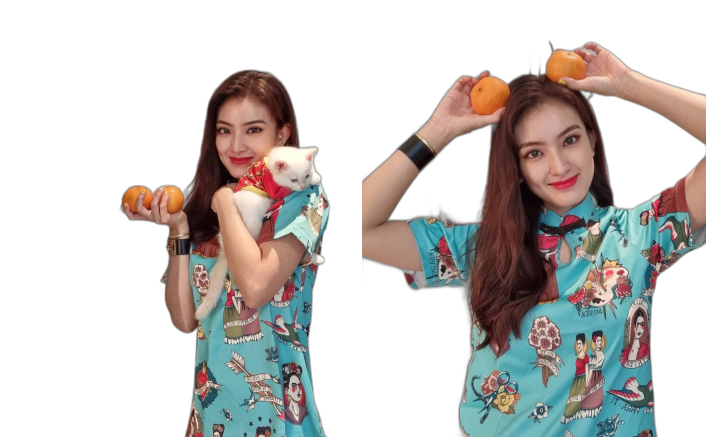

In [56]:
show_img_compar(imgfile8, imgfile9)

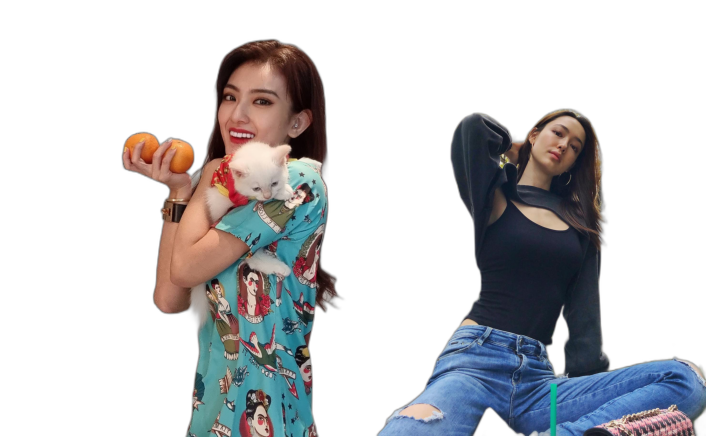

In [57]:
show_img_compar(imgfile10, imgfile11)

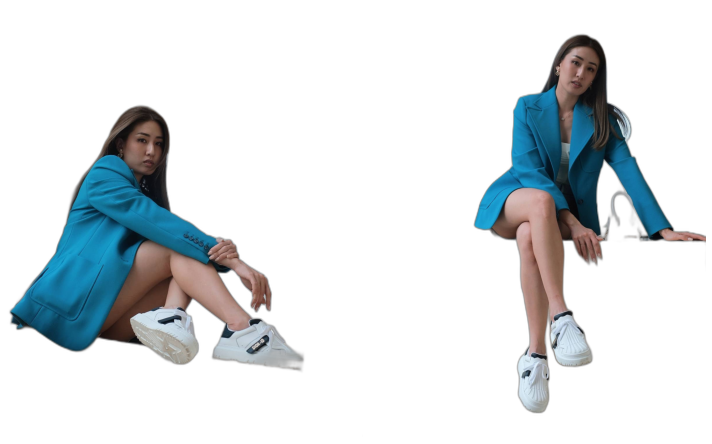

In [58]:
show_img_compar(imgfile12, imgfile13)

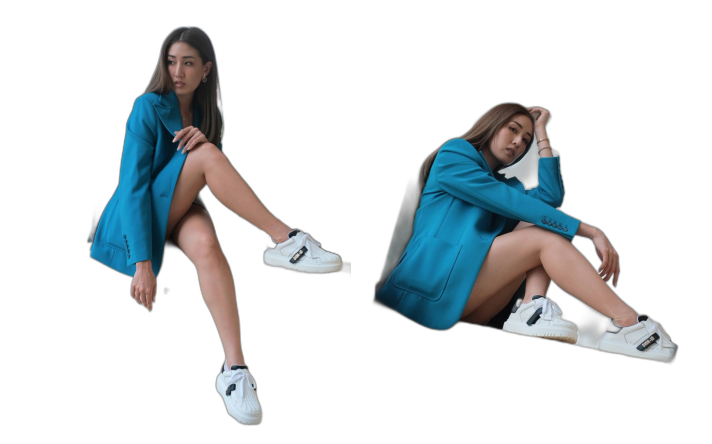

In [59]:
show_img_compar(imgfile14, imgfile15)

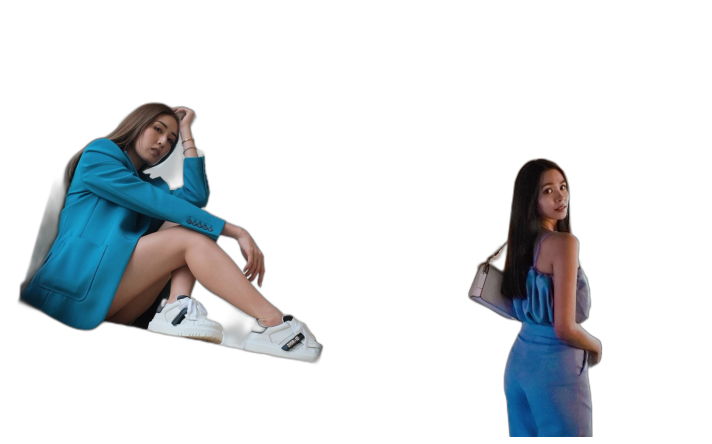

In [60]:
show_img_compar(imgfile15, imgfile16)

In [61]:
#get centers labelled 3
feb_center3 = feb_center_labels.loc[feb_center_labels['feb_filtered_labels'] == 3]
feb_center3.reset_index(drop=True, inplace = True)
feb_center3

feb_filtered_array  feb_filtered_labels
0        [98, 74, 78]                    3
1        [33, 54, 74]                    3
2       [131, 79, 90]                    3
3        [73, 99, 65]                    3
4        [21, 45, 78]                    3
5       [45, 60, 107]                    3
6        [25, 39, 94]                    3
7        [40, 42, 83]                    3
8        [95, 72, 78]                    3
9        [77, 12, 24]                    3
10       [31, 46, 54]                    3
11       [63, 92, 97]                    3
12      [101, 81, 43]                    3
13       [88, 56, 66]                    3
14       [51, 91, 98]                    3
15      [58, 66, 128]                    3
16       [25, 41, 58]                    3
17       [89, 18, 15]                    3
18       [95, 63, 64]                    3

In [62]:
feb_center3_list = feb_center3['feb_filtered_array'].tolist()
feb_center3_list

[[98, 74, 78],
 [33, 54, 74],
 [131, 79, 90],
 [73, 99, 65],
 [21, 45, 78],
 [45, 60, 107],
 [25, 39, 94],
 [40, 42, 83],
 [95, 72, 78],
 [77, 12, 24],
 [31, 46, 54],
 [63, 92, 97],
 [101, 81, 43],
 [88, 56, 66],
 [51, 91, 98],
 [58, 66, 128],
 [25, 41, 58],
 [89, 18, 15],
 [95, 63, 64]]

In [63]:
#define a function to determine if a photo's centre belongs to the identified overall month's center
def belong_center3(x):
    x = x.tolist()
    if x in feb_center3_list:
        return 1
    else:
        return 0

In [64]:
feb_df['center1_3_match_feb_center3'] = feb_df['center1_3'].apply(belong_center3)
feb_df['center2_3_match_feb_center3'] = feb_df['center2_3'].apply(belong_center3)
feb_df['center3_3_match_feb_center3'] = feb_df['center3_3'].apply(belong_center3)

In [65]:
feb_df['anycenter3match'] = feb_df['center1_3_match_feb_center3'] + \
feb_df['center2_3_match_feb_center3'] + feb_df['center3_3_match_feb_center3']

In [66]:
feb_df_center3match = feb_df.loc[feb_df['anycenter3match'] != 0]
len(feb_df_center3match)

19

In [67]:
feb_center3_imagelist = feb_df_center3match['image_list'].to_list()
feb_center3_imagelist

['../pictures/wo_background/jiaqiwoo/jiaqiwoo_2021-02-08_3.png',
 '../pictures/wo_background/jiaqiwoo/jiaqiwoo_2021-02-02_3.png',
 '../pictures/wo_background/jiaqiwoo/jiaqiwoo_2021-02-02_2.png',
 '../pictures/wo_background/carriewst/carriewst_2021-02-25_C.png',
 '../pictures/wo_background/kimlimhl/kimlimhl_2021-02-13_C.png',
 '../pictures/wo_background/novitalam/novitalam_2021-02-04_1.png',
 '../pictures/wo_background/zoetay10/zoetay10_2021-02-28_3.png',
 '../pictures/wo_background/zoetay10/zoetay10_2021-02-28_9.png',
 '../pictures/wo_background/denisesoongeelyn/denisesoongeelyn_2021-02-28_2.png',
 '../pictures/wo_background/saffronsharpe/saffronsharpe_2021-02-25_2.png',
 '../pictures/wo_background/elaineruimin/elaineruimin_2021-02-11_1.png',
 '../pictures/wo_background/mirchelley/mirchelley_2021-02-09_2.png',
 '../pictures/wo_background/fionafussi/fionafussi_2021-02-21_C.png',
 '../pictures/wo_background/soniachew/soniachew_2021-02-07_2.png',
 '../pictures/wo_background/narellekheng/n

In [68]:
imgfile1 = Image.open(feb_center3_imagelist[7])
imgfile2 = Image.open(feb_center3_imagelist[15])

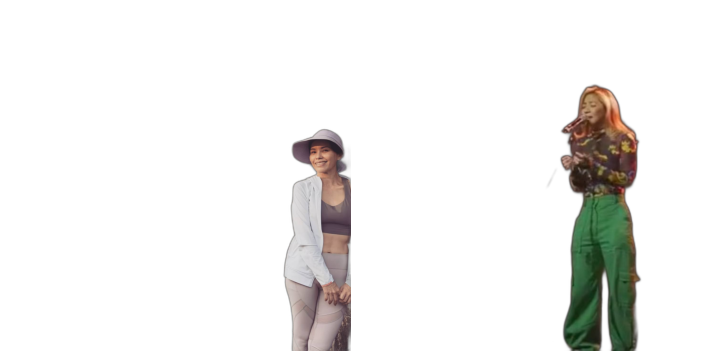

In [69]:
show_img_compar(imgfile1, imgfile2)

In [70]:
#get centers labelled 4
feb_center4 = feb_center_labels.loc[feb_center_labels['feb_filtered_labels'] == 4]
feb_center4.reset_index(drop=True, inplace = True)

In [71]:
feb_center4_list = feb_center4['feb_filtered_array'].tolist()

In [72]:
#define a function to determine if a photo's centre belongs to the identified overall month's center
def belong_center4(x):
    x = x.tolist()
    if x in feb_center4_list:
        return 1
    else:
        return 0

In [73]:
feb_df['center1_3_match_feb_center4'] = feb_df['center1_3'].apply(belong_center4)
feb_df['center2_3_match_feb_center4'] = feb_df['center2_3'].apply(belong_center4)
feb_df['center3_3_match_feb_center4'] = feb_df['center3_3'].apply(belong_center4)

In [74]:
feb_df['anycenter4match'] = feb_df['center1_3_match_feb_center4'] + \
feb_df['center2_3_match_feb_center4'] + feb_df['center3_3_match_feb_center4']

In [75]:
feb_df_center4match = feb_df.loc[feb_df['anycenter4match'] != 0]
len(feb_df_center4match)

45

In [76]:
feb_center4_imagelist = feb_df_center4match['image_list'].to_list()

In [77]:
imgfile1 = Image.open(feb_center4_imagelist[0])
imgfile2 = Image.open(feb_center4_imagelist[1])
imgfile3 = Image.open(feb_center4_imagelist[2])
imgfile4 = Image.open(feb_center4_imagelist[3])
imgfile5 = Image.open(feb_center4_imagelist[4])
imgfile6 = Image.open(feb_center4_imagelist[5])
imgfile7 = Image.open(feb_center4_imagelist[6])
imgfile8 = Image.open(feb_center4_imagelist[7])
imgfile9 = Image.open(feb_center4_imagelist[8])
imgfile10 = Image.open(feb_center4_imagelist[9])
imgfile11 = Image.open(feb_center4_imagelist[10])
imgfile12 = Image.open(feb_center4_imagelist[11])
imgfile13 = Image.open(feb_center4_imagelist[12])
imgfile14 = Image.open(feb_center4_imagelist[13])
imgfile15 = Image.open(feb_center4_imagelist[14])
imgfile16 = Image.open(feb_center4_imagelist[15])
imgfile17 = Image.open(feb_center4_imagelist[16])
imgfile18 = Image.open(feb_center4_imagelist[17])
imgfile19 = Image.open(feb_center4_imagelist[18])
imgfile20 = Image.open(feb_center4_imagelist[19])
imgfile21 = Image.open(feb_center4_imagelist[20])
imgfile22 = Image.open(feb_center4_imagelist[21])
imgfile23 = Image.open(feb_center4_imagelist[22])
imgfile24 = Image.open(feb_center4_imagelist[23])
imgfile25 = Image.open(feb_center4_imagelist[24])
imgfile26 = Image.open(feb_center4_imagelist[25])
imgfile27 = Image.open(feb_center4_imagelist[26])
imgfile28 = Image.open(feb_center4_imagelist[27])
imgfile29 = Image.open(feb_center4_imagelist[28])
imgfile30 = Image.open(feb_center4_imagelist[29])
imgfile31 = Image.open(feb_center4_imagelist[30])

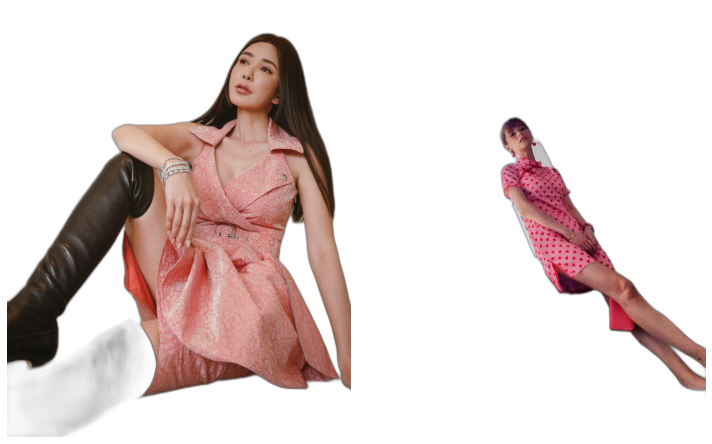

In [78]:
show_img_compar(imgfile1, imgfile4)

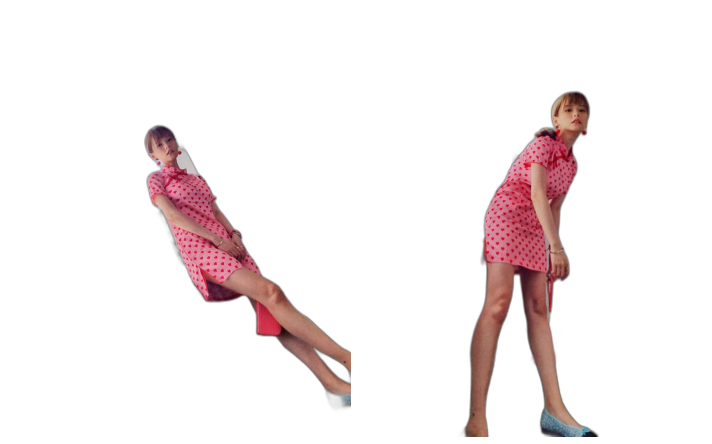

In [79]:
show_img_compar(imgfile5, imgfile6)

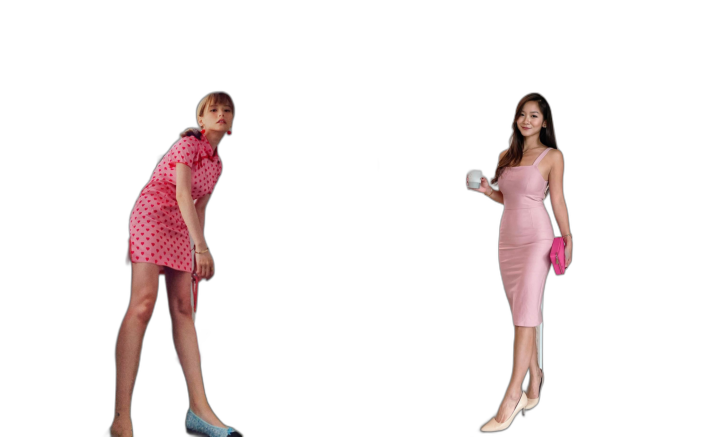

In [80]:
show_img_compar(imgfile6, imgfile14)

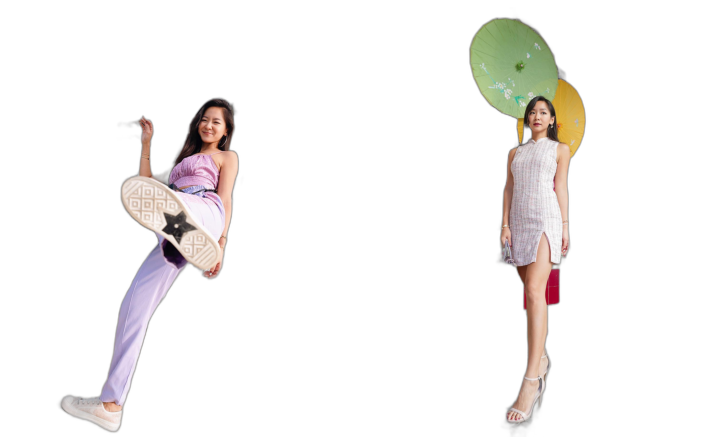

In [81]:
show_img_compar(imgfile15, imgfile16)

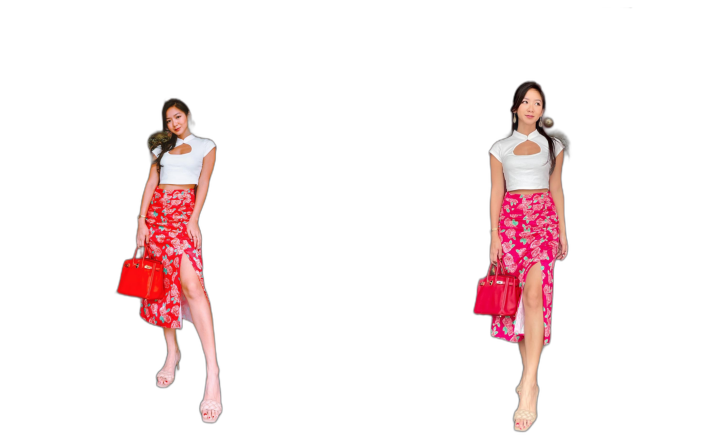

In [82]:
show_img_compar(imgfile19, imgfile20)

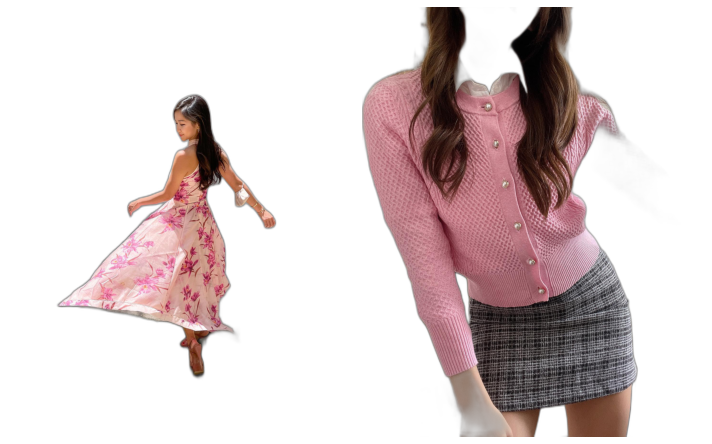

In [83]:
show_img_compar(imgfile21, imgfile24)

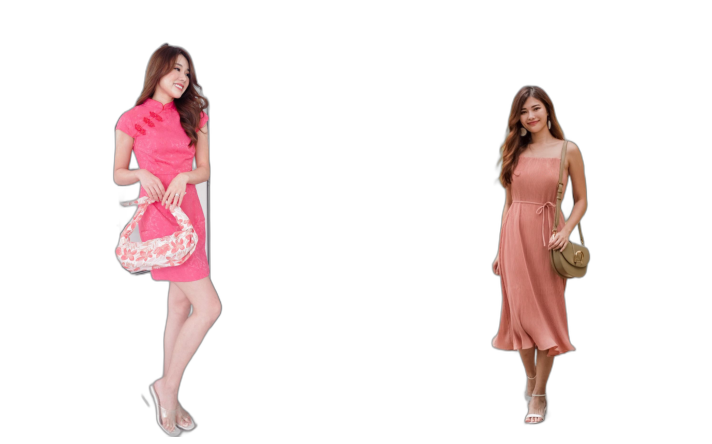

In [84]:
show_img_compar(imgfile25, imgfile26)

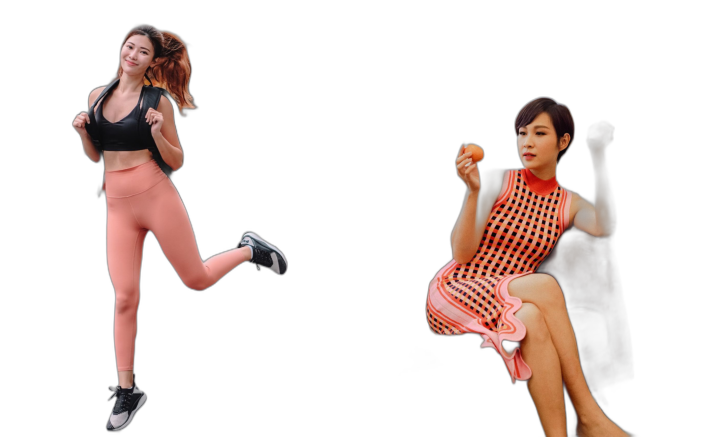

In [85]:
show_img_compar(imgfile28, imgfile31)

In [86]:
#get centers labelled 0
feb_center0 = feb_center_labels.loc[feb_center_labels['feb_filtered_labels'] == 0]
feb_center0.reset_index(drop=True, inplace = True)

In [87]:
feb_center0_list = feb_center0['feb_filtered_array'].tolist()

In [88]:
#define a function to determine if a photo's centre belongs to the identified overall month's center
def belong_center0(x):
    x = x.tolist()
    if x in feb_center0_list:
        return 1
    else:
        return 0

In [89]:
feb_df['center1_3_match_feb_center0'] = feb_df['center1_3'].apply(belong_center0)
feb_df['center2_3_match_feb_center0'] = feb_df['center2_3'].apply(belong_center0)
feb_df['center3_3_match_feb_center0'] = feb_df['center3_3'].apply(belong_center0)

In [90]:
feb_df['anycenter0match'] = feb_df['center1_3_match_feb_center0'] + \
feb_df['center2_3_match_feb_center0'] + feb_df['center3_3_match_feb_center0']

In [91]:
feb_df_center0match = feb_df.loc[feb_df['anycenter0match'] != 0]
len(feb_df_center0match)

97

As expected, red/pink hues were popular during the last CNY. However, some interesting insights from even those color clusters could be gleaned (e.g. patterned fabric with different hues of red appeared in a few photos, and softer pinks were popular vs the bright pink/red one might expect from CNY).

A surprise color that was also quite a dominant color in Feb was a blueish-green tone, which could serve as a possible choice for blogshop owners to consider if they want to differentiate themselves

## 4b. November clusters

In [92]:
nov_df = cluster3labels_month_k(11,5)[0]
nov_df

image_list instagram_handle  \
0    ../pictures/wo_background/ec24m/ec24m_2021-11-...            ec24m   
1    ../pictures/wo_background/ec24m/ec24m_2021-11-...            ec24m   
2    ../pictures/wo_background/ec24m/ec24m_2021-11-...            ec24m   
3    ../pictures/wo_background/ec24m/ec24m_2021-11-...            ec24m   
4    ../pictures/wo_background/ec24m/ec24m_2021-11-...            ec24m   
..                                                 ...              ...   
674  ../pictures/wo_background/xinlinnn/xinlinnn_20...         xinlinnn   
675  ../pictures/wo_background/xinlinnn/xinlinnn_20...         xinlinnn   
676  ../pictures/wo_background/xinlinnn/xinlinnn_20...         xinlinnn   
677  ../pictures/wo_background/xinlinnn/xinlinnn_20...         xinlinnn   
678  ../pictures/wo_background/xinlinnn/xinlinnn_20...         xinlinnn   

      date_post  seq_post_samedate  month        center1_3        center2_3  \
0    2021-11-09                  2     11  [152, 138, 129]     [45, 45, 48]   
1    2021-11-09                  3     11  [140, 125, 116]     [47, 44, 46]   
2    2021-11-09                  1     11  [148, 132, 122]     [45, 42, 44]   
3    2021-11-30                  0     11     [54, 37, 32]  [215, 193, 177]   
4    2021-11-25                  9     11  [217, 197, 172]    [101, 90, 71]   
..          ...                ...    ...              ...              ...   
674  2021-11-30                  1     11  [203, 189, 182]     [67, 37, 27]   
675  2021-11-29                  1     11     [22, 18, 19]  [221, 203, 201]   
676  2021-11-10                  1     11  [220, 192, 190]     [46, 34, 36]   
677  2021-11-10                  2     11  [148, 127, 122]  [193, 191, 199]   
678  2021-11-12                  1     11     [29, 55, 70]  [137, 126, 130]   

           center3_3 colorgroup1_3 colorgroup2_3 colorgroup3_3  
0     [115, 100, 94]          grey         black          grey  
1    [181, 162, 145]          grey         black         brown  
2    [205, 186, 165]          grey         black          grey  
3    [149, 126, 116]         black          grey          grey  
4    [183, 157, 125]          nude          grey         brown  
..               ...           ...           ...           ...  
674  [162, 135, 131]          grey         black          grey  
675  [164, 123, 110]         black          grey         brown  
676  [162, 112, 100]          grey         black         brown  
677    [100, 73, 60]          grey          grey          grey  
678  [201, 200, 210]         green          grey          grey  

[679 rows x 11 columns]

In [93]:
nov_filtered_array = cluster3labels_month_k(11,5)[1]

In [94]:
nov_filtered_labels = cluster3labels_month_k(11,5)[2]

In [95]:
#merge filtered array with labels
nov_filtered_array = nov_filtered_array.tolist()
nov_filtered_labels = nov_filtered_labels.tolist()
nov_center_labels = pd.DataFrame(zip(nov_filtered_array, nov_filtered_labels), \
                                 columns = ['nov_filtered_array', 'nov_filtered_labels'])

nov_center_labels

nov_filtered_array  nov_filtered_labels
0         [151, 0, 14]                    2
1         [34, 44, 63]                    0
2      [218, 202, 215]                    3
3      [200, 140, 155]                    1
4      [217, 191, 176]                    3
..                 ...                  ...
183     [127, 67, 115]                    1
184    [202, 209, 223]                    3
185    [152, 145, 147]                    1
186    [209, 185, 174]                    3
187    [194, 121, 108]                    1

[188 rows x 2 columns]

In [96]:
#get centers labelled 2
nov_center2 = nov_center_labels.loc[nov_center_labels['nov_filtered_labels'] == 2]
nov_center2.reset_index(drop=True, inplace = True)

In [97]:
nov_center2_list = nov_center2['nov_filtered_array'].tolist()

In [98]:
#define a function to determine if a photo's centre belongs to the identified overall month's center
def belong_center2_nov(x):
    x = x.tolist()
    if x in nov_center2_list:
        return 1
    else:
        return 0

In [99]:
nov_df['center1_3_match_nov_center2'] = nov_df['center1_3'].apply(belong_center2_nov)
nov_df['center2_3_match_nov_center2'] = nov_df['center2_3'].apply(belong_center2_nov)
nov_df['center3_3_match_nov_center2'] = nov_df['center3_3'].apply(belong_center2_nov)

In [100]:
nov_df['anycenter2match'] = nov_df['center1_3_match_nov_center2'] + \
nov_df['center2_3_match_nov_center2'] + nov_df['center3_3_match_nov_center2']

In [101]:
nov_df_center2match = nov_df.loc[nov_df['anycenter2match'] != 0]
len(nov_df_center2match)

24

In [102]:
nov_center2_imagelist = nov_df_center2match['image_list'].to_list()

In [103]:
imgfile1 = Image.open(nov_center2_imagelist[0])
imgfile2 = Image.open(nov_center2_imagelist[1])
imgfile3 = Image.open(nov_center2_imagelist[2])
imgfile4 = Image.open(nov_center2_imagelist[3])
imgfile5 = Image.open(nov_center2_imagelist[4])
imgfile6 = Image.open(nov_center2_imagelist[5])
imgfile7 = Image.open(nov_center2_imagelist[6])
imgfile8 = Image.open(nov_center2_imagelist[7])
imgfile9 = Image.open(nov_center2_imagelist[8])
imgfile10 = Image.open(nov_center2_imagelist[9])
imgfile11 = Image.open(nov_center2_imagelist[10])
imgfile12 = Image.open(nov_center2_imagelist[11])
imgfile13 = Image.open(nov_center2_imagelist[12])
imgfile14 = Image.open(nov_center2_imagelist[13])
imgfile15 = Image.open(nov_center2_imagelist[14])
imgfile16 = Image.open(nov_center2_imagelist[15])
imgfile17 = Image.open(nov_center2_imagelist[16])
imgfile18 = Image.open(nov_center2_imagelist[17])
imgfile19 = Image.open(nov_center2_imagelist[18])
imgfile20 = Image.open(nov_center2_imagelist[19])
imgfile21 = Image.open(nov_center2_imagelist[20])
imgfile22 = Image.open(nov_center2_imagelist[21])
imgfile23 = Image.open(nov_center2_imagelist[22])
imgfile24 = Image.open(nov_center2_imagelist[23])

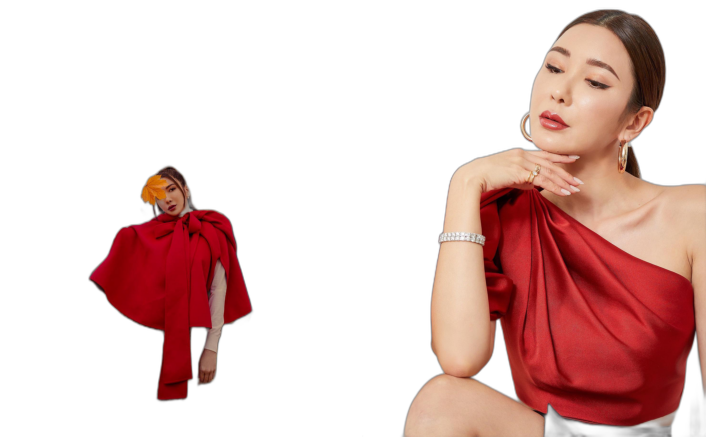

In [104]:
show_img_compar(imgfile1, imgfile3)

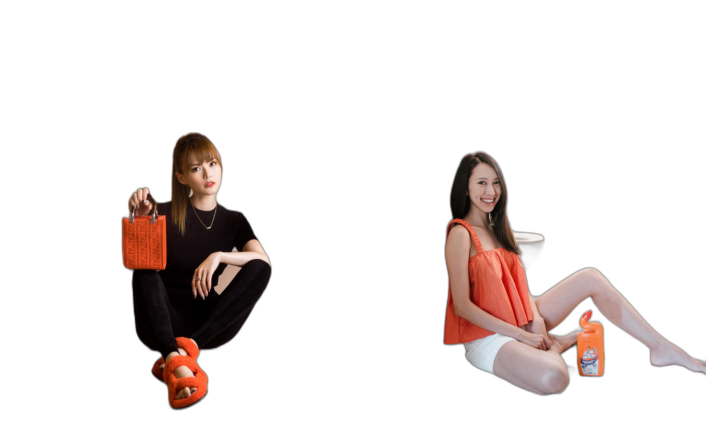

In [105]:
show_img_compar(imgfile4, imgfile14)

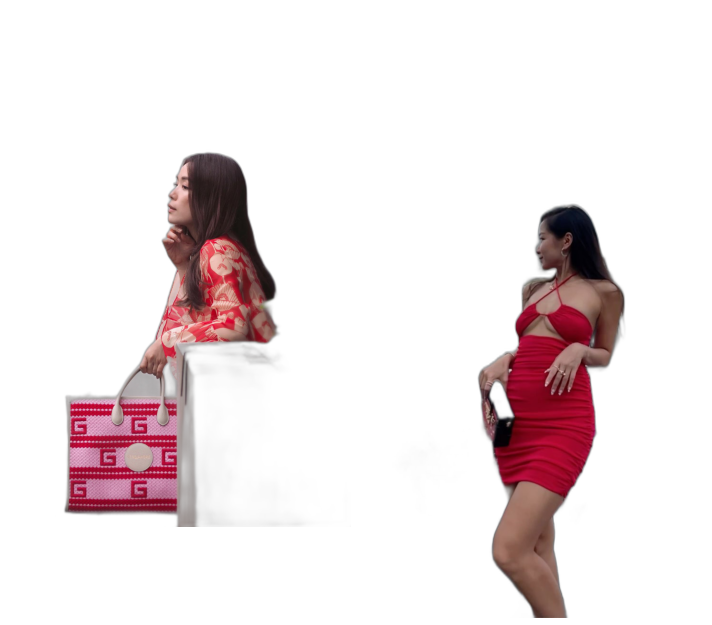

In [106]:
show_img_compar(imgfile6, imgfile7)

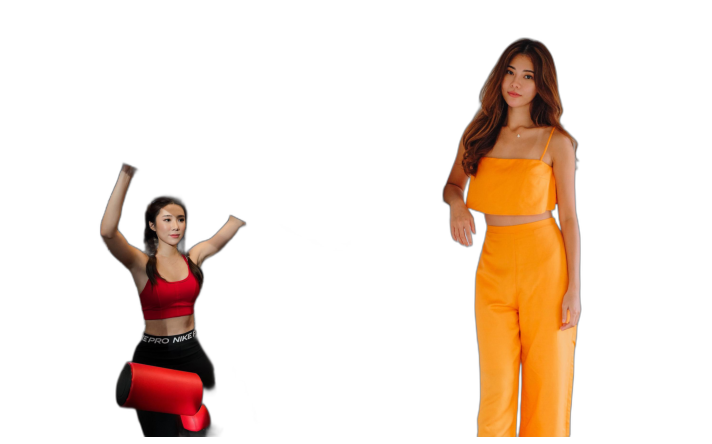

In [107]:
show_img_compar(imgfile8, imgfile9)

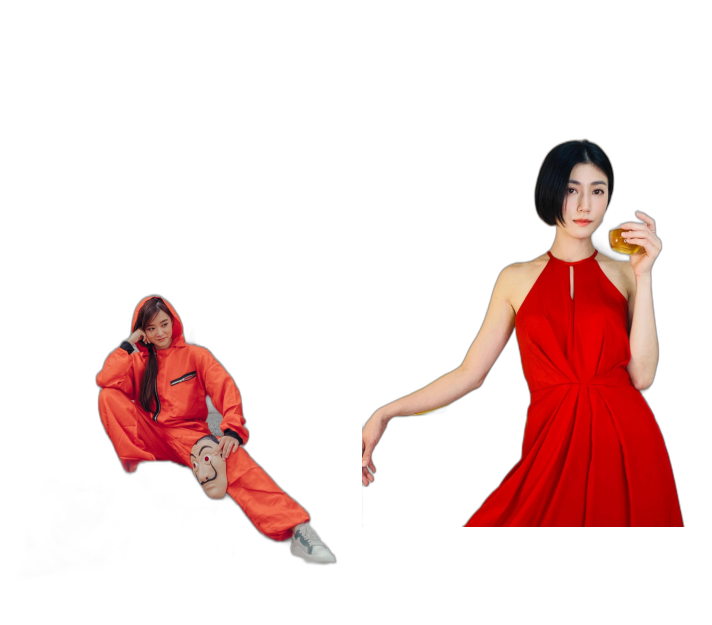

In [108]:
show_img_compar(imgfile16, imgfile17)

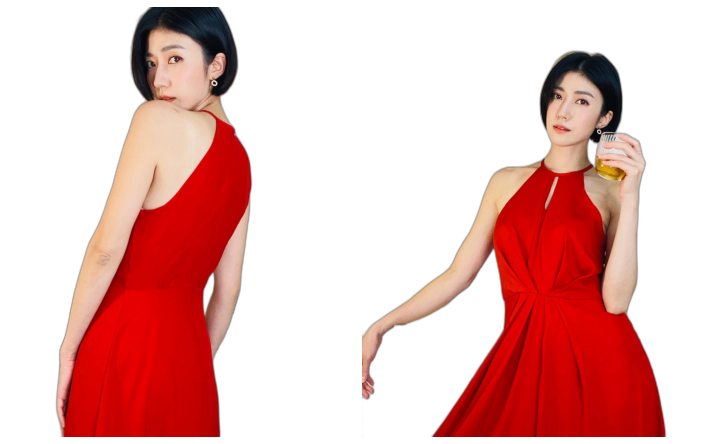

In [109]:
show_img_compar(imgfile18, imgfile19)

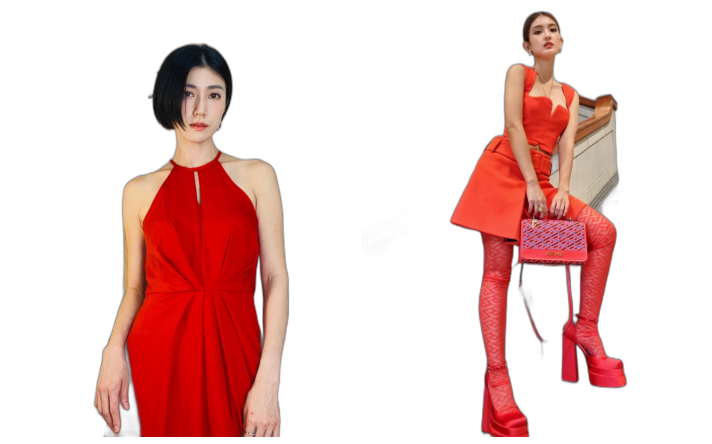

In [110]:
show_img_compar(imgfile20, imgfile21)

In [111]:
#get centers labelled 0
nov_center0 = nov_center_labels.loc[nov_center_labels['nov_filtered_labels'] == 0]
nov_center0.reset_index(drop=True, inplace = True)

In [112]:
nov_center0_list = nov_center0['nov_filtered_array'].tolist()

In [113]:
#define a function to determine if a photo's centre belongs to the identified overall month's center
def belong_center0_nov(x):
    x = x.tolist()
    if x in nov_center0_list:
        return 1
    else:
        return 0

In [114]:
nov_df['center1_3_match_nov_center0'] = nov_df['center1_3'].apply(belong_center0_nov)
nov_df['center2_3_match_nov_center0'] = nov_df['center2_3'].apply(belong_center0_nov)
nov_df['center3_3_match_nov_center0'] = nov_df['center3_3'].apply(belong_center0_nov)

In [115]:
nov_df['anycenter0match'] = nov_df['center1_3_match_nov_center0'] + \
nov_df['center2_3_match_nov_center0'] + nov_df['center3_3_match_nov_center0']

In [116]:
nov_df_center0match = nov_df.loc[nov_df['anycenter0match'] != 0]
len(nov_df_center0match)

33

In [117]:
nov_center0_imagelist = nov_df_center0match['image_list'].to_list()

In [118]:
imgfile1 = Image.open(nov_center0_imagelist[0])
imgfile2 = Image.open(nov_center0_imagelist[1])
imgfile3 = Image.open(nov_center0_imagelist[2])
imgfile4 = Image.open(nov_center0_imagelist[3])
imgfile5 = Image.open(nov_center0_imagelist[4])
imgfile6 = Image.open(nov_center0_imagelist[5])
imgfile7 = Image.open(nov_center0_imagelist[6])
imgfile8 = Image.open(nov_center0_imagelist[7])
imgfile9 = Image.open(nov_center0_imagelist[8])
imgfile10 = Image.open(nov_center0_imagelist[9])
imgfile11 = Image.open(nov_center0_imagelist[10])
imgfile12 = Image.open(nov_center0_imagelist[11])
imgfile13 = Image.open(nov_center0_imagelist[12])
imgfile14 = Image.open(nov_center0_imagelist[13])
imgfile15 = Image.open(nov_center0_imagelist[14])
imgfile16 = Image.open(nov_center0_imagelist[15])

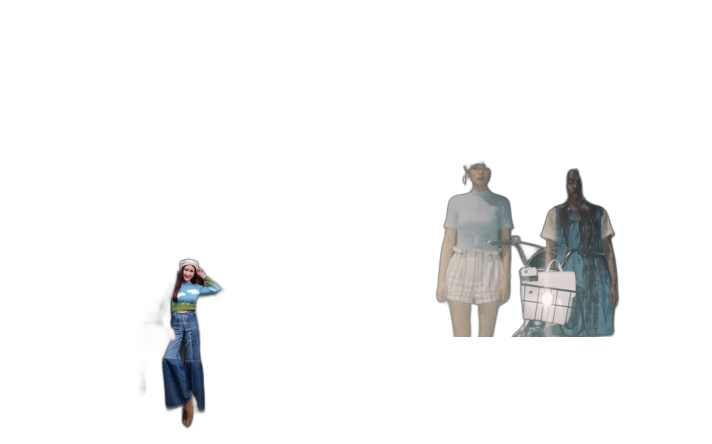

In [119]:
show_img_compar(imgfile1, imgfile2)

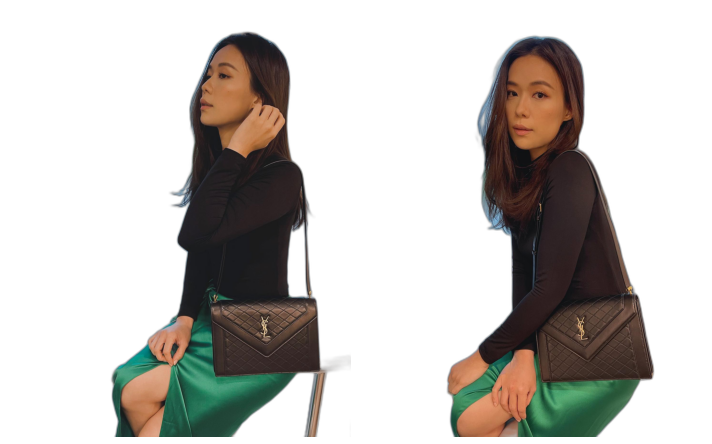

In [120]:
show_img_compar(imgfile3, imgfile4)

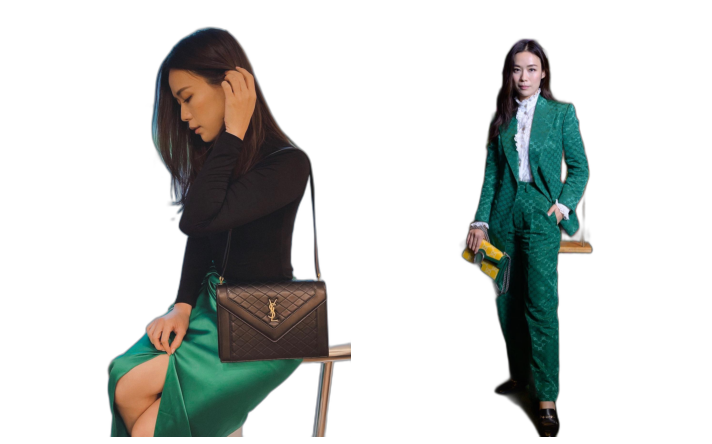

In [121]:
show_img_compar(imgfile5, imgfile6)

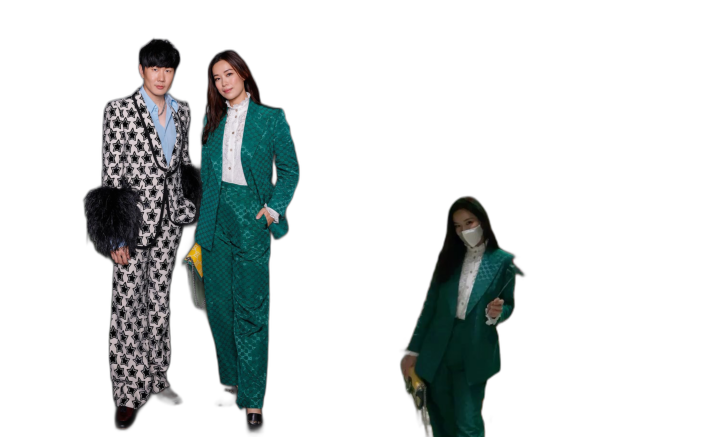

In [122]:
show_img_compar(imgfile7, imgfile8)

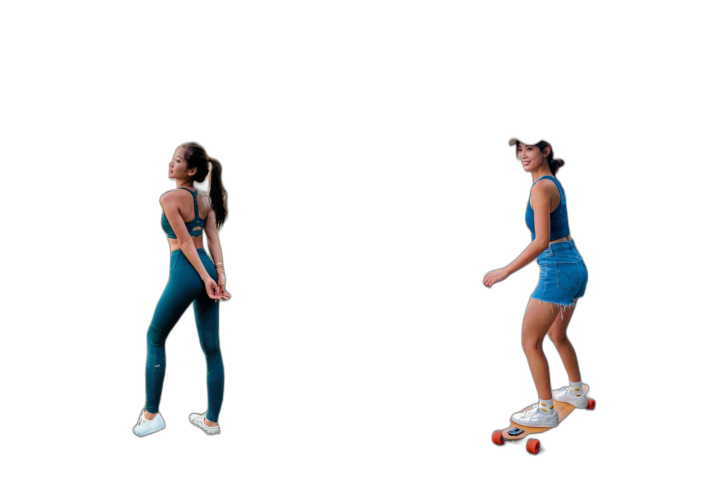

In [123]:
show_img_compar(imgfile13, imgfile16)

In [124]:
#get centers labelled 1
nov_center1 = nov_center_labels.loc[nov_center_labels['nov_filtered_labels'] == 1]
nov_center1.reset_index(drop=True, inplace = True)

In [125]:
nov_center1_list = nov_center1['nov_filtered_array'].tolist()

In [126]:
#define a function to determine if a photo's centre belongs to the identified overall month's center
def belong_center1_nov(x):
    x = x.tolist()
    if x in nov_center1_list:
        return 1
    else:
        return 0

In [127]:
nov_df['center1_3_match_nov_center1'] = nov_df['center1_3'].apply(belong_center1_nov)
nov_df['center2_3_match_nov_center1'] = nov_df['center2_3'].apply(belong_center1_nov)
nov_df['center3_3_match_nov_center1'] = nov_df['center3_3'].apply(belong_center1_nov)

In [128]:
nov_df['anycenter1match'] = nov_df['center1_3_match_nov_center1'] + \
nov_df['center2_3_match_nov_center1'] + nov_df['center3_3_match_nov_center1']

In [129]:
nov_df_center1match = nov_df.loc[nov_df['anycenter1match'] != 0]
len(nov_df_center1match)

44

In [130]:
#get centers labelled 3
nov_center3 = nov_center_labels.loc[nov_center_labels['nov_filtered_labels'] == 3]
nov_center3.reset_index(drop=True, inplace = True)

In [131]:
nov_center3_list = nov_center3['nov_filtered_array'].tolist()

In [132]:
#define a function to determine if a photo's centre belongs to the identified overall month's center
def belong_center3_nov(x):
    x = x.tolist()
    if x in nov_center3_list:
        return 1
    else:
        return 0

In [133]:
nov_df['center1_3_match_nov_center3'] = nov_df['center1_3'].apply(belong_center3_nov)
nov_df['center2_3_match_nov_center3'] = nov_df['center2_3'].apply(belong_center3_nov)
nov_df['center3_3_match_nov_center3'] = nov_df['center3_3'].apply(belong_center3_nov)

In [134]:
nov_df['anycenter3match'] = nov_df['center1_3_match_nov_center3'] + \
nov_df['center2_3_match_nov_center3'] + nov_df['center3_3_match_nov_center3']

In [135]:
nov_df_center3match = nov_df.loc[nov_df['anycenter3match'] != 0]
len(nov_df_center3match)

63

In [136]:
nov_center3_imagelist = nov_df_center3match['image_list'].to_list()

In [137]:
imgfile1 = Image.open(nov_center3_imagelist[0])
imgfile2 = Image.open(nov_center3_imagelist[1])
imgfile3 = Image.open(nov_center3_imagelist[2])
imgfile4 = Image.open(nov_center3_imagelist[3])
imgfile5 = Image.open(nov_center3_imagelist[4])
imgfile6 = Image.open(nov_center3_imagelist[5])
imgfile7 = Image.open(nov_center3_imagelist[6])
imgfile8 = Image.open(nov_center3_imagelist[7])
imgfile9 = Image.open(nov_center3_imagelist[8])
imgfile10 = Image.open(nov_center3_imagelist[9])

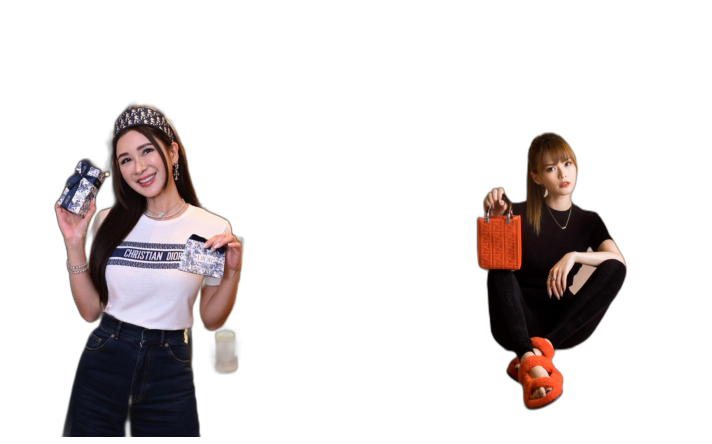

In [138]:
show_img_compar(imgfile3, imgfile4)

In [139]:
#get centers labelled 4
nov_center4 = nov_center_labels.loc[nov_center_labels['nov_filtered_labels'] == 4]
nov_center4.reset_index(drop=True, inplace = True)

In [140]:
nov_center4_list = nov_center4['nov_filtered_array'].tolist()

In [141]:
#define a function to determine if a photo's centre belongs to the identified overall month's center
def belong_center4_nov(x):
    x = x.tolist()
    if x in nov_center4_list:
        return 1
    else:
        return 0

In [142]:
nov_df['center1_3_match_nov_center4'] = nov_df['center1_3'].apply(belong_center4_nov)
nov_df['center2_3_match_nov_center4'] = nov_df['center2_3'].apply(belong_center4_nov)
nov_df['center3_3_match_nov_center4'] = nov_df['center3_3'].apply(belong_center4_nov)

In [143]:
nov_df['anycenter4match'] = nov_df['center1_3_match_nov_center4'] + \
nov_df['center2_3_match_nov_center4'] + nov_df['center3_3_match_nov_center4']

In [144]:
nov_df_center4match = nov_df.loc[nov_df['anycenter4match'] != 0]
len(nov_df_center4match)

21

In [145]:
nov_center4_imagelist = nov_df_center4match['image_list'].to_list()

In [146]:
imgfile1 = Image.open(nov_center4_imagelist[0])
imgfile2 = Image.open(nov_center4_imagelist[1])
imgfile3 = Image.open(nov_center4_imagelist[2])
imgfile4 = Image.open(nov_center4_imagelist[3])
imgfile5 = Image.open(nov_center4_imagelist[4])
imgfile6 = Image.open(nov_center4_imagelist[5])
imgfile7 = Image.open(nov_center4_imagelist[6])
imgfile8 = Image.open(nov_center4_imagelist[7])
imgfile9 = Image.open(nov_center4_imagelist[8])
imgfile10 = Image.open(nov_center4_imagelist[9])

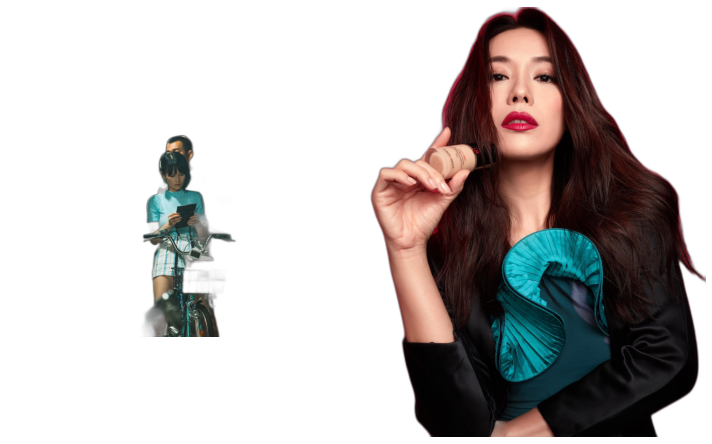

In [147]:
show_img_compar(imgfile1, imgfile2)

There are some orange hues spotted in November, which could be an indication of a trend towards such tones and could be a possible choice for the upcoming CNY collection as well